# Introduction

All product/service providers must analyze patterns, trends between customers as well as monitor each customer individually to understand their needs and meet their expectations by paying special attention. If these needs are not fulfilled, it may lead to customer dissatisfaction and consequently, the customer may decide to terminate utilizing the services and products of that organization. This is also applicable in the banking environmment and is known as churning.
Churning may be attributed to a lot of factors such as the change in customer's behavior/preference over time or better services/products being offered by competitors.


Predictive analytics can be used to develop a model that predicts a set of customers that are more prone to churn and consequently, the organization may focus their efforts to retain these customers by offering additional services or other rewards. Numerical attributes such as current balance, salary, age, tenure(with the bank), number of products (accounts,credit card, debit card) can throw a lot of insight on the decison-making process of a customer to churn in addition to other classifiers such as possessing a credit card, being an active member and/or location.

# Dataset

The datasource contains a list of 10,000 bank customers for different data points associated with each customer. These attributes have been derived from the bank database and contains customer_id, name, credit score, age, tenure with the bank, current balance, salary, number of products with the bank, gender, branch location and whether he/she possesses a credit card and the activity level with the bank. These factors shall be used to predict the churning output. It also contains the result stating whether the customer actually terminated services with the bank, later on.

Reference:
    SuperDataScience Team. (2018, December 3). Retrieved February 22, 2019 from https://www.superdatascience.com/pages/training
        

# Project Definition

For a given customer with the associated attributes, the project will predict if that customer shall leave the bank(churn) or not.

# Data Exploration

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/irahu/Downloads/Churn_Modelling.csv')

In [2]:
#code here for exploring data
print("Number of samples = ",len(df))
df.head()

Number of samples =  10000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['OUTPUT_LABEL']=df['Exited']

In [4]:
df[df['OUTPUT_LABEL']==1].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OUTPUT_LABEL
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,1


In [5]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [6]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.204


The prevalence of the positive class indicates the overall rate at which the customers closed their bank accounts and terminated services with this bank (or churned). 
In this case, the value is 0.204 which means that 20.4% of the customers actually churned.

ATTRIBUTE EXPLORATION

In [7]:
print('Number of columns', len(df.columns))

Number of columns 15


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OUTPUT_LABEL
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


We can observe that the first three columns viz. RowNumber, CustomerId, Surname are not factors or predictors of a customer's decision to leave the bank. The remaining attributes contribute to the output variable of churning. Among them, the numerical features are: credit score, age, tenure, balance,number of products and estimated salary. On the other hand, categorical variables are: Gender(Male or Female), Geography (France, Spain or Germany) and other classifiers such as HasCrCard, IsActiveMember with binary values.

# Feature Engineering

Feature Engineering is the process of transforming the attributes of the data into a form that can be easily understood by the machine, prior to the application of machine learning algorithms. It is done to increase the accuracy and predictive capability of the final model. It is essential to have knowledge and experience relevant to the domain of that particular dataset. Only after understanding the meaning of each data point and its impact on the output, variables are chosen to be included or excluded.

In case of numerical features in this churning dataset: the values of credit score, age, salary, tenure, balance, number of products have a mathematical/associated relationship with the output(churning). The increase in credit score, balance, salary, tenure, number of products may tend to decrease the probability of customer churning as these represent satisfied customers or dependent customers which increase their loyalty towards the bank. On the other hand, age may affect the output differently. For instance, very young customers and very old customers shall stay for a longer period compared to customers around their 40s who have gained stability in their career and may decide to move to other/better locations.
    
In case of categorical features, I used one-hot encoding to convert categories with string values into columns with binary values. One-hot encoding is the process of converting categorical attributes into binary form with the help of dummy variables(representing different types of that category) so that machine learning algorithms may be implemented to predict the output variable. In simple words, it converts n types of a category into n-1 columns with binary values 1-indicating presence/belonging to that type and 0-implying absence/not belonging to that category type. The difference between the category types and number of columns is 1 because one column is intentionally eliminated to remove the dependency between columns as absence in all columns indirectly means the presence in the missing column. For instance: Geography has 3 types- France, Spain, Germany. After the application of one-hot encoding, the France column is eliminated leaving Spain and Germany columns. If a row contains 0 values in both these columns, it is obvious that the record belongs to France.

In case of categorical numerical features, the features containing numerical values may represent different categories. In this scenario, it is necessary to convert the numerical datatype into string format so that the process of one-hot encoding may be implemented. For instance, IsActiveMember contains two values 1- representing an active customer and 0- representing an inactive customer. Therefore we shall use .astype(str) for changing the datatype of that column before one-hot encoding. This variable could have directly been included as a numerical variable but since it classifies customers into different groups (active/inactive or with/without credit card), I have chosen to use it as a categorical variable.

NUMERICAL FEATURES

In [9]:
for col in list(df.columns):
    
    n=df[col].unique()
    
    if len(n)<30:
        print(col)
        print(n)
        
    else:
        print(col + ": "+ str(len(n)) +' unique values')

RowNumber: 10000 unique values
CustomerId: 10000 unique values
Surname: 2932 unique values
CreditScore: 460 unique values
Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']
Age: 70 unique values
Tenure
[ 2  1  8  7  4  6  3 10  5  9  0]
Balance: 6382 unique values
NumOfProducts
[1 3 2 4]
HasCrCard
[1 0]
IsActiveMember
[1 0]
EstimatedSalary: 9999 unique values
Exited
[1 0]
OUTPUT_LABEL
[1 0]


In [10]:
import numpy as np

In [11]:
cols_num=['Age','CreditScore','Tenure','NumOfProducts','Balance','EstimatedSalary']

In [12]:
df[cols_num].isnull().sum()

Age                0
CreditScore        0
Tenure             0
NumOfProducts      0
Balance            0
EstimatedSalary    0
dtype: int64

All the numerical variables have values and none of them possess null values.

CATEGORICAL VARIABLES

In [13]:
cols_cat=['Gender','Geography']

In [14]:
df.Gender.head()

0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [15]:
pd.get_dummies(df['Gender'],prefix='Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
pd.get_dummies(df['Gender'],prefix='Gender',drop_first=True).head()

,Gender_Male
0,0
1,0
2,0
3,0
4,0


In [17]:
pd.get_dummies(df[cols_cat],drop_first=True).head()

,Gender_Male,Geography_Germany,Geography_Spain
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,1


CATEGORICAL VARIABLES WITH NUMBERS

In [18]:
cols_cat_num=['HasCrCard','IsActiveMember']

In [19]:
df[cols_cat_num]=df[cols_cat_num].astype('str')

In [20]:
pd.get_dummies(df[cols_cat_num],drop_first=True).head()

,HasCrCard_1,IsActiveMember_1
0,1,1
1,0,1
2,1,0
3,0,0
4,1,1


In [21]:
df_cat=pd.get_dummies(df[cols_cat + cols_cat_num],drop_first=True)
df_cat.head()

,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard_1,IsActiveMember_1
0,0,0,0,1,1
1,0,0,1,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,1,1,1


In [22]:
cols_all_cat=list(df_cat.columns)

In [23]:
df=pd.concat([df,df_cat],axis=1)

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OUTPUT_LABEL,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard_1,IsActiveMember_1
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,1,1


In [25]:
print('Total number of features: ', len(cols_num+cols_all_cat))
print('Numerical features: ', len(cols_num))
print('Categorical features: ', len(cols_all_cat))

Total number of features:  11
Numerical features:  6
Categorical features:  5


In [26]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending=False)

IsActiveMember_1     0
HasCrCard_1          0
Geography_Spain      0
Geography_Germany    0
Gender_Male          0
EstimatedSalary      0
Balance              0
NumOfProducts        0
Tenure               0
CreditScore          0
Age                  0
dtype: int64

In [27]:
cols_input=cols_all_cat+cols_num
df_data=df[cols_input+['OUTPUT_LABEL']]

In [28]:
df_data.head()

,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard_1,IsActiveMember_1,Age,CreditScore,Tenure,NumOfProducts,Balance,EstimatedSalary,OUTPUT_LABEL
0,0,0,0,1,1,42,619,2,1,0.00,101348.88,1
1,0,0,1,0,1,41,608,1,1,83807.86,112542.58,0
2,0,0,0,1,0,42,502,8,3,159660.80,113931.57,1
3,0,0,0,0,0,39,699,1,2,0.00,93826.63,0
4,0,0,1,1,1,43,850,2,1,125510.82,79084.10,0


# Building Training/Validation/Test Samples

It is important to split the dataset into training, validation and test samples. The machine learning model is trained using the training sample, hyperparameters are fine-tuned using the validation sample and finally the output is predicted for the test sample.

In our case, we have split the training sample as 70% of the original dataset. This training data set is used to fit the model by relating the input variables to the output variables. Both these variables are known.

The validation sample consist of 15% of the original data. It is used to evaluate the performance of prediction algorithms created with the help of the training sample. Based on the performance, the most suitable algorithm is chosen. This algorithm is used to predict the final test sample.

The test sample consist of the remaining 15% of the original data. The algorithm diectly/indirectly learns from the training/validation samples to optimize parameters. Here, the actual performance is measured as the chosen algorithm is implemented on real, unseen data and the output of these variables are not used in the prediction. 

In [29]:
df_data=df_data.sample(n=len(df_data),random_state=42)
df_data=df_data.reset_index(drop=True)

In [30]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [31]:
df_test=df_valid_test.sample(frac=0.50,random_state=42)
df_valid=df_valid_test.drop(df_test.index)

In [32]:
df_train_all=df_data.drop(df_valid_test.index)

In [33]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 1500):0.219
Valid prevalence(n = 1500):0.207
Train all prevalence(n = 7000):0.200


In [34]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 10000)


Balancing the training sample is extremely important because the machine shall be biased towards the prevelence of the majority class.

In case of a training sample with 1000 records, 950 of which shall be positive and the remaining 50 negative; the machine shall assign/predict all the records of this data as positive and would not be able to detect any negative values. Therefore, although the overall accuracy is 95%, the specifity would be zero as there would be no true negative. The specificity concept is very important in the healthcare sector to detect whether a patients is carrying a disease or not, would be readmitted or not. 

Inorder to balance, we shall remove the bias towards the majority of the prevalence class by grouping positive and negative classes separately and create a subset of the prevalence class so that the number of records in each group is equal. The resulting sample is also known as a sub-sample. In cases where identifying a certain group is a bigger priority, the fraction of that group can be increased to manipulate the algorithm to predict that class more accurately.

In [35]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 2796):0.500


In [36]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [37]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [38]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [39]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [40]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,Gender_Male,0.546714
1,Geography_Germany,0.248571
2,Geography_Spain,0.250429
3,HasCrCard_1,0.703857
4,IsActiveMember_1,0.521143


In [41]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [42]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (7000, 11)
Training shapes: (2796, 11) (2796,)
Validation shapes: (1500, 11) (1500,)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [45]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [46]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
print(X_train_tf[:,1])

[-0.57515083 -0.57515083 -0.57515083 ...  1.73867435 -0.57515083
 -0.57515083]


# Model Selection 

In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [48]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

K nearest neigbors(KNN) is widely used to predict classification problems. The K in 'K Nearest Neigbors' is the number of neigboring data points to be considered for predicting the output. Depending on the value of k, the output of the k closest(distance-wise) points are selected and their output is used to evaluate the output of a specific data point with a probability index. 

For instance, if we were to represent each record of the table on a graph with a circle. Red circles representing positive values meaning that the customer left the bank and blue circles indicating that the customer did not leave the bank. Let us say that the value of k is 100, the output of a particular data point is determined by accessing the output of the 100 closest neigboring data points. If we have 90 red circles (positives) and 10 blue circles(negatives) as the 100 closest neighbors then we can say that the probability that the particular data point is positive (customer churned) is 90% and there is a 10% probability that the customer shall not leave the bank. 

The threshold value is set to label that point as positive or negative. Generally, this value is set as 0.5. Therefore, if probability of positive value >= 0.5, that data point is labelled as positive, else negative and vice-versa for negative probability. The value of k should not be very large because it shall represent the majority of the population(which may be positively/negatively biased). Typically, the value of k is selected as the square root of the number of records.

In [49]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 52)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=52, p=2,
           weights='uniform')

In [50]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
print(y_train_preds,len(y_train_preds))
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
[0.78846154 0.59615385 0.34615385 ... 0.73076923 0.42307692 0.48076923] 2796
AUC:0.831
accuracy:0.753
recall:0.705
precision:0.780
specificity:0.771
prevalence:0.500
 
Validation:
AUC:0.817
accuracy:0.761
recall:0.716
precision:0.451
specificity:0.756
prevalence:0.207
 


### Logistic Regression

Logistic regresson is a classification algorithm with discrete output values. These values could be in the binary, categotical or ordinal form. It is used when the dependent variable (variable to be predicted) would belong to a set of discrete outcomes while the independent variables (predictors) may be continuous in nature. It does so with the help of a sigmoid function that is implemented on a linear regression function to obtain a probability value. With this probability and defined threshold value, the output is classified accordingly. 

In the case of churning customers, this value is set at 0.5. Therefore, if the probability is greater than or equal to 0.5 then we shall label that data point (customer) as a positive class (customer shall leave the bank) else negative class (customer shall stay).

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train_tf,y_train)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.771
accuracy:0.709
recall:0.695
precision:0.714
specificity:0.722
prevalence:0.500
 
Validation:
AUC:0.775
accuracy:0.693
recall:0.713
precision:0.373
specificity:0.687
prevalence:0.207
 


### Stochastic Gradient Descent

Gradient descent is an algorithm that optimizes the values of the parameters (coefficients of the independent varaibles) in the linear regression such that the difference between the predicted value and actual result is minimum. This difference can be interpreted as the cost function or sum of squared errors. In a nutshell, the algorithm begins by initiating the parameters with some random value and continues to change these values such that the sum of squared errors is minimum.

In stochastic gradient descent, the iteration is performed for each record while the value of parameters change simultaneously. For the given dataset of customer churn, the parameters are re-calculated and evaluated for each customer until the algorithm correctly predicts the results (with least possible error).

In [53]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss='log',alpha=0.1,random_state=42)
sgdc.fit(X_train_tf,y_train)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.770
accuracy:0.706
recall:0.690
precision:0.712
specificity:0.722
prevalence:0.500
 
Validation:
AUC:0.775
accuracy:0.693
recall:0.710
precision:0.372
specificity:0.688
prevalence:0.207
 


### Naive Bayes

Naive Bayes is a classifier model that uses posterior probability to obtain the most likely result. Posterior probability is the likelihood of an event occurring, given a set of conditions. 

Basically, the Naive Bayes model is used as a machine learning model to predict the probability of an outcome, with a given set of predictor variables. This model assumes that the predictor variables are independent of each other, therefore, they are not correlated with each other. 

Generally, it is used in text classification and detecting fraudulent activities. An example of text classification is food review. If the review contains words such as 'delcious', 'tasty' among other positive adjectives, Naive Bayes can be implemented to obtain the probability that the review is good or bad given the list of keywords.

In [55]:
# your code here
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_tf,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.794
accuracy:0.720
recall:0.690
precision:0.735
specificity:0.751
prevalence:0.500
 
Validation:
AUC:0.795
accuracy:0.733
recall:0.713
precision:0.415
specificity:0.738
prevalence:0.207
 


### Decision Tree Classifier

A decison-tree follows the structure of a flowchart where the internal node represents an attribute, branch provides the decision rule for splitting the data further into subsequent nodes (belonging to other attributes) until the leaf node with the output label is reached.

The most important aspect of this classification algorithm is the sequence of nodes selected right from the root node. In such cases, 'Information gain' or 'Gini index' may be used to select the root node and the subsequent nodes. Information gain and entropy(measure of uncertainty or impurity in a variable) is a metric to estimate the information gained from an attribute about the variable to be predicted. The attribute with the highest score is placed at the top as the root node and the other nodes are arranged in descending order of this metric.

Gini index is a metric that evaluates the inaccuracy of split on the attribute by comparing the ratio of classes/labels after the split. Attributes are then arranged with root node containing the lowest gini index value followed by subsequent nodes with higher gini index values. 

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=10,random_state=42)
tree.fit(X_train_tf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [58]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.963
accuracy:0.889
recall:0.872
precision:0.902
specificity:0.896
prevalence:0.500
 
Validation:
AUC:0.788
accuracy:0.747
recall:0.771
precision:0.436
specificity:0.734
prevalence:0.207
 


### Random Forest

Random forest algorithm compares different randomly generated decision trees to arrive at a best model that contains the features having the highest average importance. The features in each of the randomly generated decision tree belong to a random subset of all the features and have access to only a random subset of the records.

The random forest algorithm is applicable to both- regression and classification based problems. While the former predicts the outcome by taking the average from all the decision trees, the latter predicts the class based on the majority result from other decision trees.

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=6,random_state=42)
rf.fit(X_train_tf,y_train)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.886
accuracy:0.798
recall:0.780
precision:0.809
specificity:0.816
prevalence:0.500
 
Validation:
AUC:0.854
accuracy:0.769
recall:0.748
precision:0.464
specificity:0.775
prevalence:0.207
 


### Gradient Boosting Classifier

Boosting refers to the improvement/modifications implemented on a weak learner to become better. In doing so, observations that can be fairly predict the outcome are separated and attention is diverted to the development of new weak learners for the remaining observations. A weak learner is one whose performance is slightly better than random chance. In classification problems, the decison tree represents the weak learner.

The gradient boosting classifier may use the logarithmic loss function in conjunction with the decision trees to predict the output label. Each decision tree is gradually added such that the loss function reduces, similar to the gradient descent approach.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=3,random_state=42)
gbc.fit(X_train_tf,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [62]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.992
accuracy:0.957
recall:0.959
precision:0.955
specificity:0.955
prevalence:0.500
 
Validation:
AUC:0.806
accuracy:0.735
recall:0.729
precision:0.419
specificity:0.737
prevalence:0.207
 


## Performance of Baseline Models

In [63]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

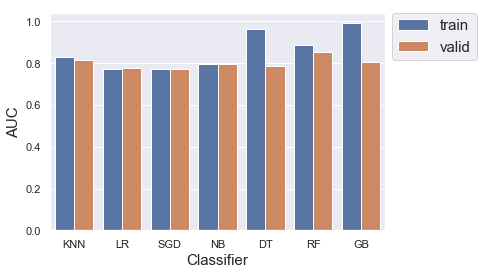

In [65]:
##AUC PERFORMANCE
ax=sns.barplot(x='classifier',y='auc',hue='data_set',data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('AUC',fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=15)
plt.show()

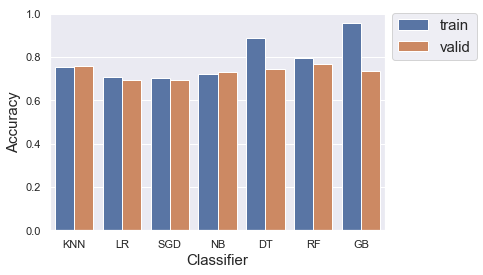

In [66]:
#ACCURACY PERFORMANCE
ax=sns.barplot(x='classifier',y='accuracy',hue='data_set',data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('Accuracy',fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=15)
plt.show()

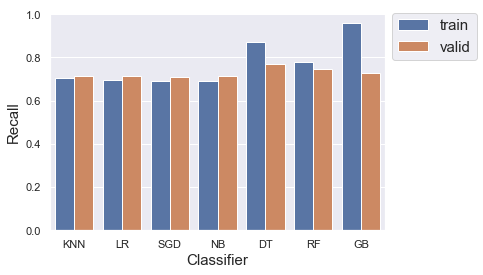

In [67]:
##RECALL PERFORMANCE
ax=sns.barplot(x='classifier',y='recall',hue='data_set',data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('Recall',fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=15)
plt.show()

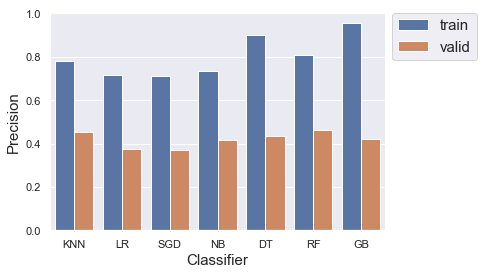

In [68]:
##PRECISION

ax=sns.barplot(x='classifier',y='precision',hue='data_set',data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('Precision',fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=15)
plt.show()

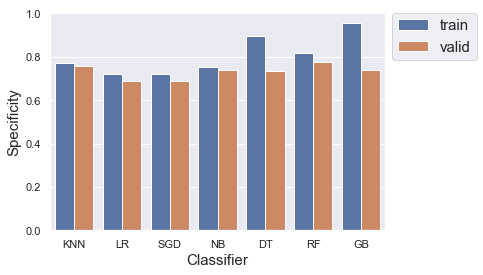

In [69]:
##SPECIFICITY

ax=sns.barplot(x='classifier',y='specificity',hue='data_set',data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('Specificity',fontsize=15)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=15)
plt.show()

In case of customer churning, we are concerned with correctly identifying the customers that are going to churn. We are not so concerned if the model contains false positive which means that the model predicted the customer shall churn but he/she did not churn. We prioritize on minimizing the false negative; false negative would be if the model predicts that the customer shall not churn but the customer actually churns. 

In such cases, recall is a good performance metric as it is inversely propotional to the number of false negatives in the sample. Recall is the ratio of number of true positives (predicted positive and actually positive) to number of actual positives in the sample(sum of true positives and false negatives). A high recall score indicates that the number of false negatives is low and vice-versa.

Based on the baseline models evaluating the recall, we find that decision tree and random forest have the highest recall score for the test and validation samples. However, we select random forest as the best baseline model to avoid overfitting. The hyperparamter in case of random forest is the maximum depth (the deepness of the tree).

In [70]:
#Random Forest
from sklearn.tree import DecisionTreeClassifier
import time

# max depths
Depths = np.arange(3,9,1)

# initialize arrays for storing the results
train_recalls = np.zeros(len(Depths))
valid_recalls = np.zeros(len(Depths))

# train a model for each K in a list. Store the auc for the training and validation set
t1 = time.time()
for jj in range(len(Depths)):
    my_depth = Depths[jj]
    
    # fit model
    tree=RandomForestClassifier(max_depth = my_depth,random_state=42)
    tree.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = tree.predict_proba(X_train_tf)[:,1]
    y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    recall_train = recall_score(y_train, (y_train_preds>0.5))
    recall_valid = recall_score(y_valid, (y_valid_preds>0.5))

    # save aucs
    train_recalls[jj] = recall_train
    valid_recalls[jj] = recall_valid
    
    # print the time
    t2 = time.time()
    print(t2-t1)
    t1 = time.time()

0.021823644638061523
0.021824359893798828
0.02430415153503418
0.0312497615814209
0.029264211654663086
0.02975916862487793


C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

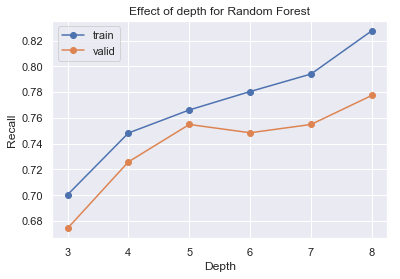

In [71]:
import matplotlib.pyplot as plt

plt.plot(Depths, train_recalls,'o-',label = 'train')
plt.plot(Depths, valid_recalls,'o-',label = 'valid')

plt.xlabel('Depth')
plt.ylabel('Recall')
plt.title('Effect of depth for Random Forest')
plt.legend()
plt.show()

## Learning Curves

In [72]:
# Your code here
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'recall')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

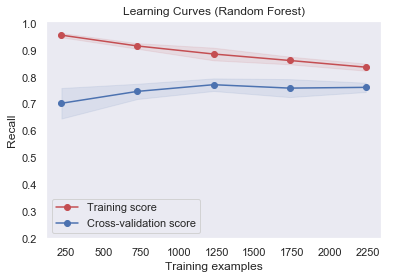

In [73]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = tree
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

According to me, the model suffers from high variance. This is also known as over-fitting. It can be seen that the performance of the model on training(seen) data is much higher than its performance on the validation(unseen) data. In addition, the performance on the validation sample seems to have plateaued at the current sample size of about 2250. Adding more samples would not improve the performance significantly.

However, adding regularization shall help improve the performance on the validation sample by not picking up on the noise present in the training sample. Regularization works to minimize the loss function (sum of squared errors) by reducing the value of coefficients/weights assigned to each feature, therefore avoiding model complexity. 

Perhaps, reducing features can also improve performance. Features that might not have a significant impact on model performance may be eliminated from the samples to enhance model simplicity and accuracy. For instance, a feature such as gender may be irrelevant in predicting whether the customer shall leave the bank or not if the bank ensures that males and females share similar benefits, policies and treatment. The same approach maybe used to remove geography if and only if they do not have as much importance in the prediction.

## Feature Importance

LOGISTIC REGRESSION FEATURE IMPORTANCE:

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [76]:
feature_importances.head()

,importance
Age,0.786991
Geography_Germany,0.301224
Balance,0.138408
EstimatedSalary,0.089658
Geography_Spain,0.023917


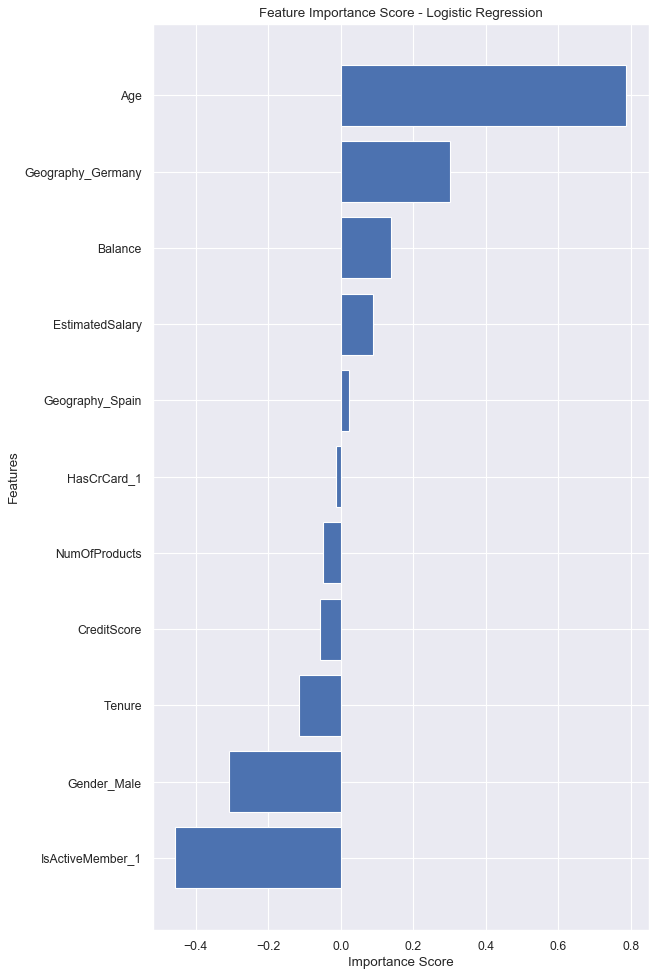

In [77]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

RANDOM FOREST FEATURE IMPORTANCE:

In [78]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [79]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
Age,0.387296
NumOfProducts,0.301153
IsActiveMember_1,0.090248
Balance,0.064157
EstimatedSalary,0.033999


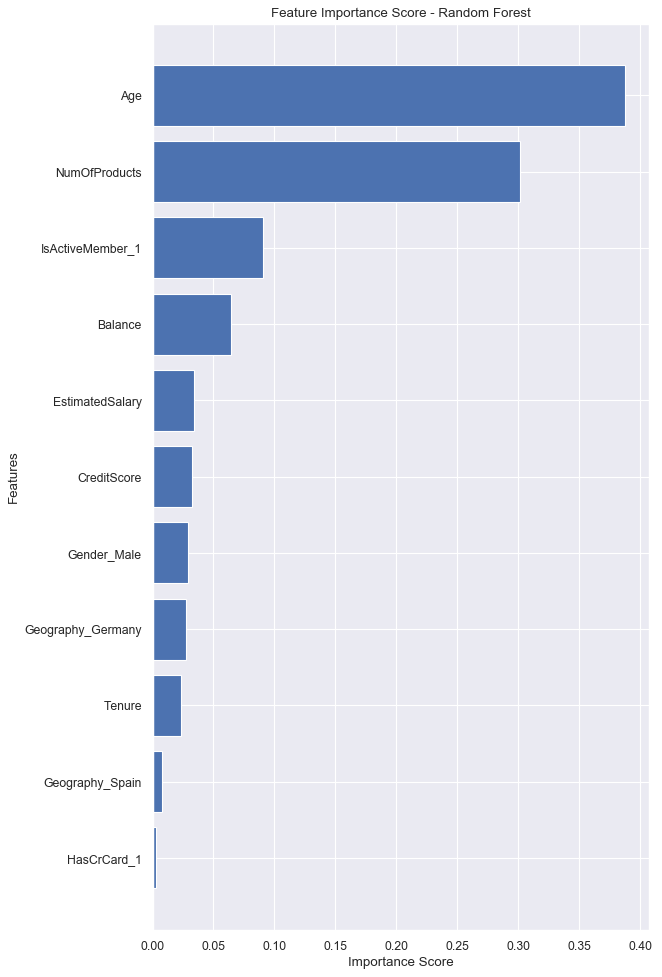

In [81]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

As it can be seen that age is big factor that leads to customer churning. Perhaps, customers from certain age brackets are more prone to leaving the bank than other customers. Perhaps, dividing the age feature into buckets of young adults, middle-aged customers and senior citizens shall improve the model performance. 

Number of products is another valuable feature. Perhaps, more knowledge can be gained about the type of each product and whether or not having a certain product influences the customer's decision more than the others. For instance, customers having an on-going loan account may be less likely to leave the bank compared to a customer with savings account. In another scenario, customers with a fixed deposit account may decide to leave the bank because the interest rate is very low. Each product may come with an inherent association that would make them leave/stay with the bank. New features relevant to this maybe added to the dataset.

As it can be seen that possessing a credit card does not have much of an impact with an importance score of less than 0.01. Therefore, we could eliminate this feature from our dataset as it maybe one of the contributing reasons for over-fitting the training data. However, removing this feature does not make much of a difference in the performance of the best model(Random Forest).

## Hyperparameter tuning

In [82]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(100,500,100)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,8,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(100, 500, 100), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 8), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [84]:
from sklearn.metrics import make_scorer, recall_score
recall_scoring = make_scorer(recall_score)

In [85]:
# BASELINE MODEL
rf = RandomForestClassifier()

# RANDOMIZED SEARCH CROSS VALIDATION
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2,
                               scoring=recall_scoring,verbose = 1, random_state = 42)

In [86]:
import time
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   12.5s finished


12.998624801635742


In [87]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'entropy'}

RANDOM FOREST

In [88]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_recall = recall_score(y_train, y_train_preds>thresh)
rf_valid_base_recall = recall_score(y_valid, y_valid_preds>thresh)

print('Training Recall:%.3f'%(rf_train_base_recall))
print('Validation Recall:%.3f'%(rf_valid_base_recall))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_recall = recall_score(y_train, y_train_preds_random>thresh)
rf_valid_opt_recall = recall_score(y_valid, y_valid_preds_random>thresh)

print('Training Recall:%.3f'%(rf_train_opt_recall))
print('Validation Recall:%.3f'%(rf_valid_opt_recall))

Baseline Random Forest
Training Recall:0.780
Validation Recall:0.748
Optimized Random Forest
Training Recall:0.783
Validation Recall:0.758


C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SGDC

In [89]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=recall_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: 

C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\irahu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: 

3.9040606021881104


In [91]:
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 800, 'alpha': 0.03}

In [92]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline SGDC')
sgdc_train_base_recall = recall_score(y_train, y_train_preds>thresh)
sgdc_valid_base_recall = recall_score(y_valid, y_valid_preds>thresh)

print('Training Recall:%.3f'%(sgdc_train_base_recall))
print('Validation Recall:%.3f'%(sgdc_valid_base_recall))

print('Optimized SGDC')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

sgdc_train_opt_recall = recall_score(y_train, y_train_preds_random>thresh)
sgdc_valid_opt_recall = recall_score(y_valid, y_valid_preds_random>thresh)

print('Training Recall:%.3f'%(sgdc_train_opt_recall))
print('Validation Recall:%.3f'%(sgdc_valid_opt_recall))

Baseline SGDC
Training Recall:0.690
Validation Recall:0.710
Optimized SGDC
Training Recall:0.699
Validation Recall:0.723


Optimize Gradient Boosting Tree Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [94]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=recall_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

4.567164659500122


In [95]:
gbc_random.best_params_

{'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.001}

In [96]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Gradient Boosting Classifier')
gbc_train_base_recall = recall_score(y_train, y_train_preds>thresh)
gbc_valid_base_recall = recall_score(y_valid, y_valid_preds>thresh)

print('Training Recall:%.3f'%(gbc_train_base_recall))
print('Validation Recall:%.3f'%(gbc_valid_base_recall))

print('Optimized Gradient Boosting Classifier')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

gbc_train_opt_recall = recall_score(y_train, y_train_preds_random>thresh)
gbc_valid_opt_recall = recall_score(y_valid, y_valid_preds_random>thresh)

print('Training Recall:%.3f'%(gbc_train_opt_recall))
print('Validation Recall:%.3f'%(gbc_valid_opt_recall))

Baseline Gradient Boosting Classifier
Training Recall:0.959
Validation Recall:0.729
Optimized Gradient Boosting Classifier
Training Recall:0.787
Validation Recall:0.777


In [97]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'recall':[sgdc_valid_base_recall,sgdc_valid_opt_recall,
                                 rf_valid_base_recall,rf_valid_opt_recall,
                                 gbc_valid_base_recall,gbc_valid_opt_recall],
                          })

In [98]:
df_results

,classifier,data_set,recall
0,SGD,baseline,0.709677
1,SGD,optimized,0.722581
2,RF,baseline,0.748387
3,RF,optimized,0.758065
4,GB,baseline,0.729032
5,GB,optimized,0.777419


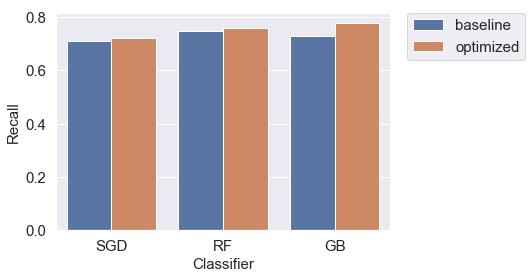

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Recall', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Best Model

Based on the graph, we can observe that the recall performance is highest for optimzed gradient boosting classifier (recall=0.78) followed closely by the optimized Random Forest(our former choice, improvement in recall=0.77 from baseline recall=0.75). Random forest performs very similar to gradient boosting classifier; both these models having a very small difference in recall between their optimized training and validation samples.

Therefore, we shall select the optimized gradient boosting classifier as the overall recall performance on the validation sample is higher.

In [100]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [102]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [103]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [104]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [105]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [106]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.832
accuracy:0.756
recall:0.787
precision:0.741
specificity:0.725
prevalence:0.500
 
Validation:
AUC:0.807
accuracy:0.727
recall:0.777
precision:0.415
specificity:0.714
prevalence:0.207
 
Test:
AUC:0.801
accuracy:0.709
recall:0.742
precision:0.409
specificity:0.699
prevalence:0.219
 


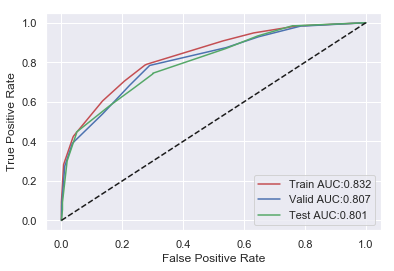

In [107]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train,y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid,y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test,y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

The Optimized Gradient Boosting Classifier performs very well on the test sample with an impressive AUC of 0.801. It possesses a high recall; for a given set of 100 customers that shall churn, the model accurately predicts 74 of them. In addition, the prediction of this model is correct 71% of the time.

The ratio of precision to prevalence(also known as lift) is 1.87 which means that the model performs about 2 times better/more accurately than randomly guessing the outcomes.